<a href="https://colab.research.google.com/github/msammons82/CrudeOilAnalysis/blob/main/Oil_Futures_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
plt.style.use('fivethirtyeight')
import yfinance as yf

     |████████████████████████████████| 63 kB 950 kB/s 
     |████████████████████████████████| 6.4 MB 18.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [3]:
df = yf.download('CL=F', start = '2000-01-01', end = '2022-04-10')

[*********************100%***********************]  1 of 1 completed


In [4]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-08-23,31.950001,32.799999,31.950001,32.049999,32.049999,79385
2000-08-24,31.900000,32.240002,31.400000,31.629999,31.629999,72978
2000-08-25,31.700001,32.099998,31.320000,32.049999,32.049999,44601
2000-08-28,32.040001,32.919998,31.860001,32.869999,32.869999,46770
2000-08-29,32.820000,33.029999,32.560001,32.720001,32.720001,49131
...,...,...,...,...,...,...
2022-04-04,98.949997,103.940002,98.050003,103.279999,103.279999,288131
2022-04-05,103.660004,105.589996,99.879997,101.959999,101.959999,280283
2022-04-06,101.239998,104.019997,95.730003,96.230003,96.230003,366036


In [5]:
df.dropna()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-08-23,31.950001,32.799999,31.950001,32.049999,32.049999,79385
2000-08-24,31.900000,32.240002,31.400000,31.629999,31.629999,72978
2000-08-25,31.700001,32.099998,31.320000,32.049999,32.049999,44601
2000-08-28,32.040001,32.919998,31.860001,32.869999,32.869999,46770
2000-08-29,32.820000,33.029999,32.560001,32.720001,32.720001,49131
...,...,...,...,...,...,...
2022-04-04,98.949997,103.940002,98.050003,103.279999,103.279999,288131
2022-04-05,103.660004,105.589996,99.879997,101.959999,101.959999,280283
2022-04-06,101.239998,104.019997,95.730003,96.230003,96.230003,366036


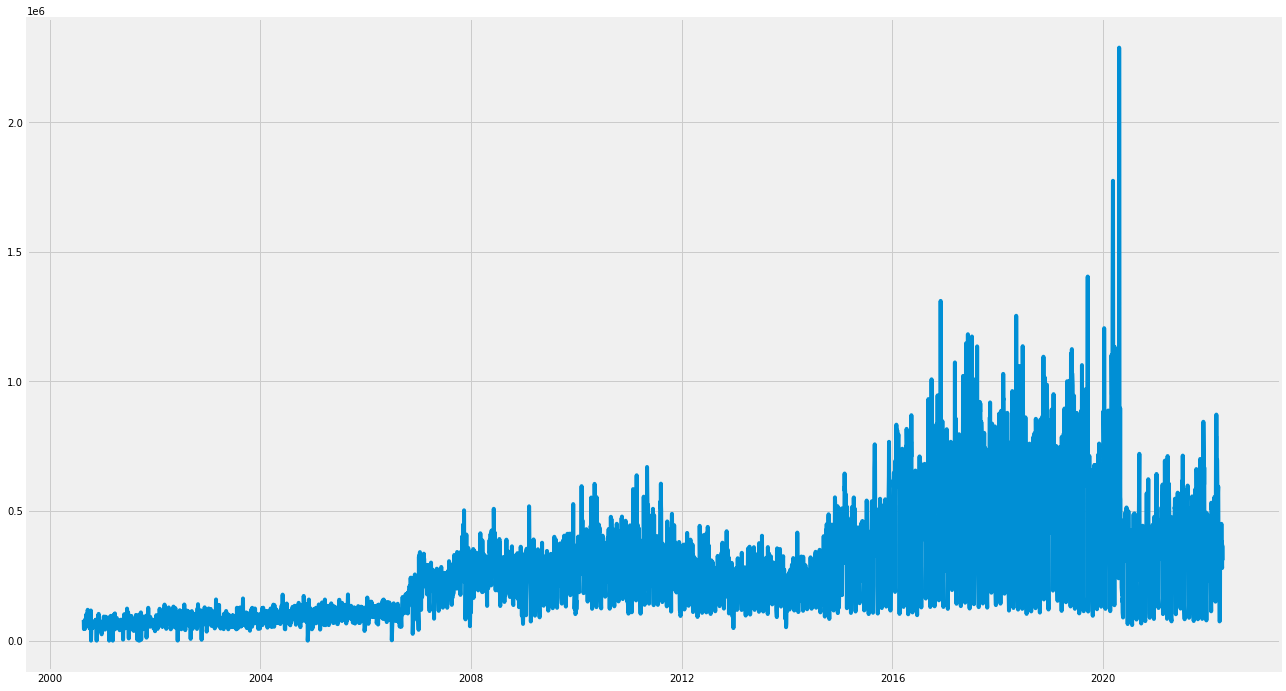

In [6]:
plt.figure(figsize=(20,12))
plt.plot(df['Volume'])

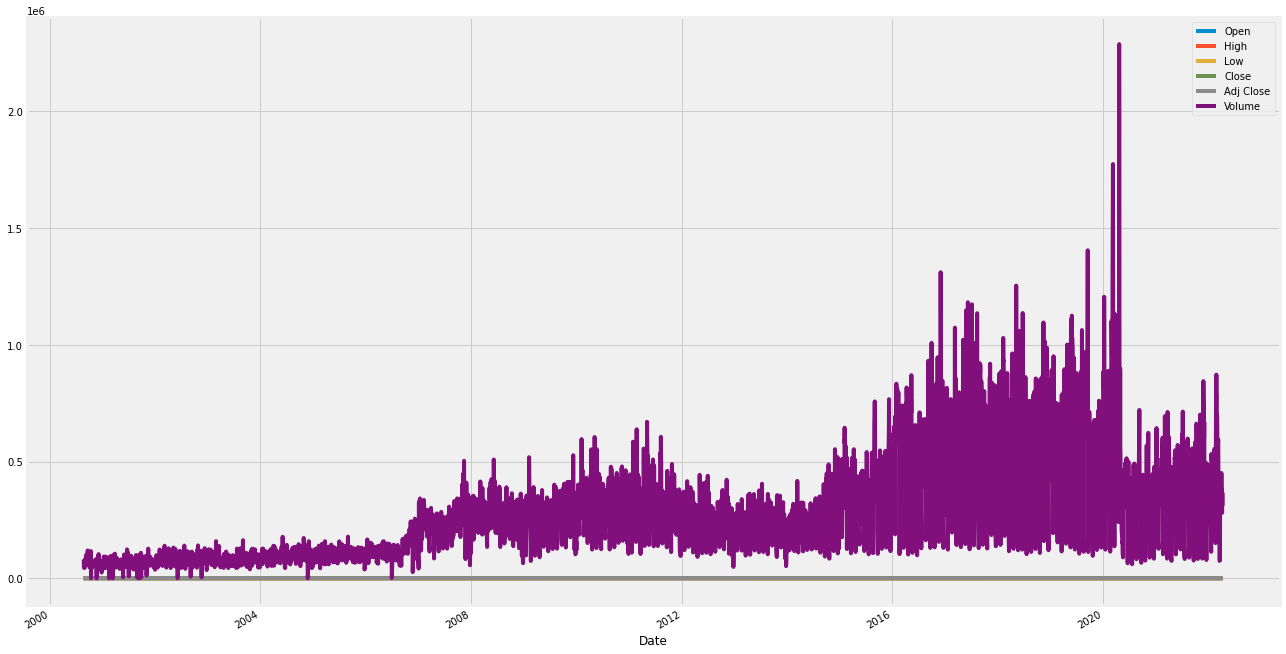

In [7]:
df.plot(figsize = (20,12))

Text(0.5, 1.0, 'Crude Oil at all Time')

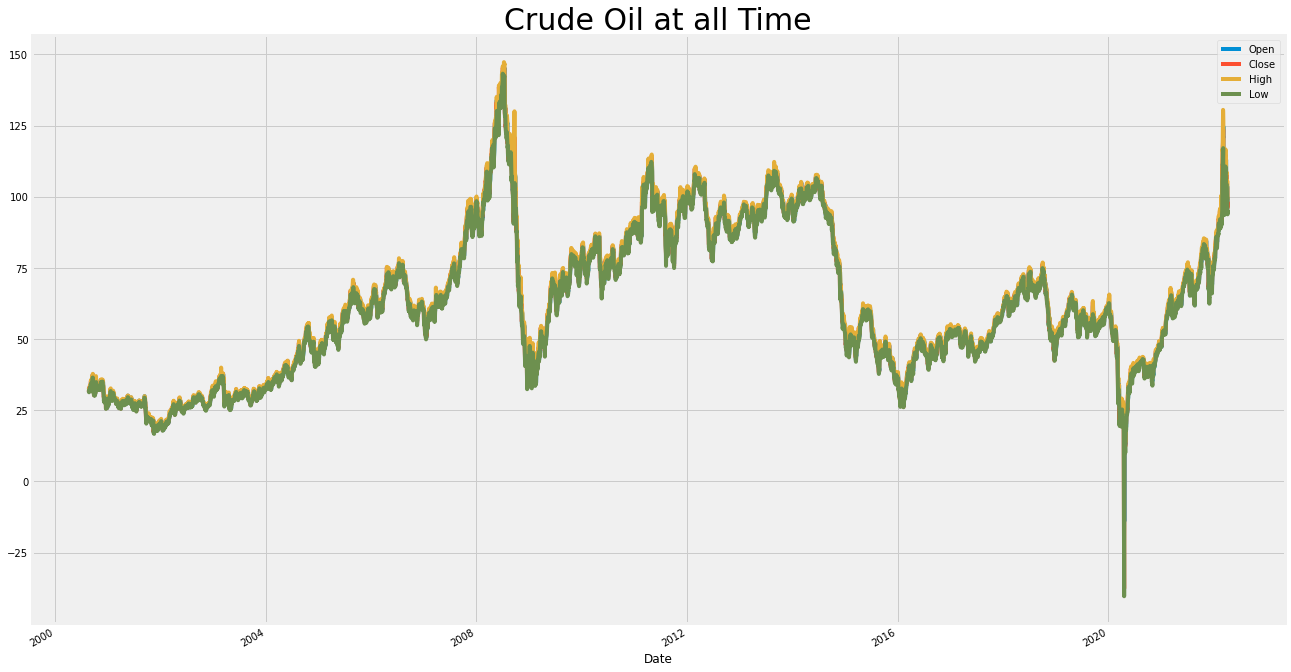

In [8]:
df[['Open','Close','High','Low']].plot(figsize = (20,12))
plt.title('Crude Oil at all Time', fontsize = 30)

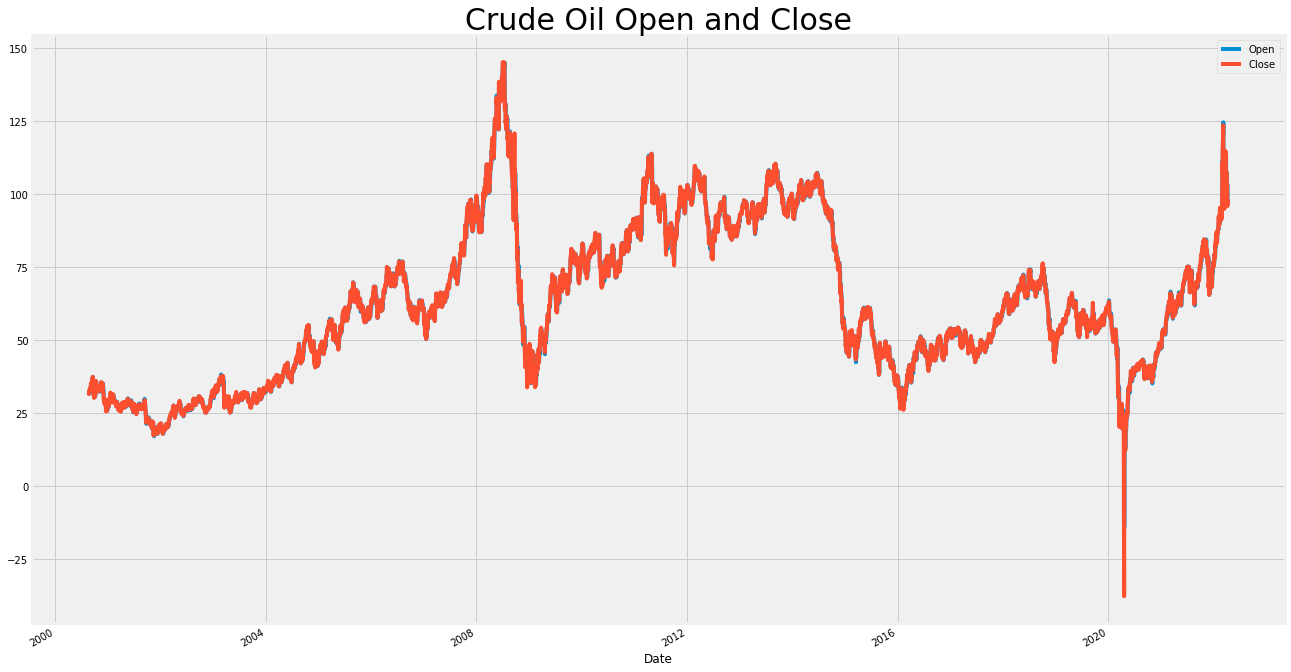

In [9]:
df[['Open', 'Close']].plot(figsize=(20,12))
plt.title('Crude Oil Open and Close', fontsize = 30)
plt.xlabel('Date')
plt.show()

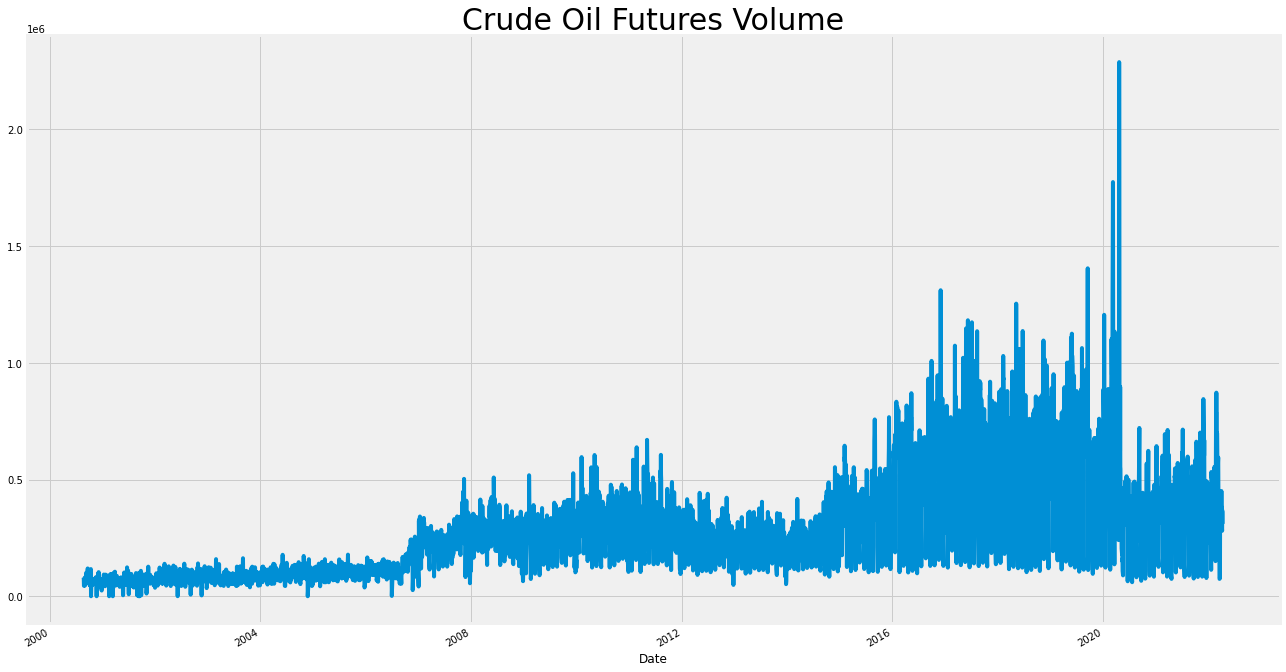

In [10]:
df['Volume'].plot(figsize = (20,12))
plt.title('Crude Oil Futures Volume', fontsize = 30)
plt.show()

In [11]:
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [12]:
print(adf_test(df['High']))

Results of Dickey-Fuller Test:
Test Statistic                   -2.309747
p-value                           0.168844
#Lags Used                       20.000000
Number of Observations Used    5410.000000
Critical Value (1%)              -3.431559
Critical Value (5%)              -2.862074
Critical Value (10%)             -2.567054
dtype: float64
None


In [13]:
print(adf_test(df['High'].resample('MS').mean()))

Results of Dickey-Fuller Test:
Test Statistic                  -2.661078
p-value                          0.081019
#Lags Used                       1.000000
Number of Observations Used    259.000000
Critical Value (1%)             -3.455853
Critical Value (5%)             -2.872765
Critical Value (10%)            -2.572752
dtype: float64
None


Results of Dickey-Fuller Test:
Test Statistic                -1.084204e+01
p-value                        1.606789e-19
#Lags Used                     0.000000e+00
Number of Observations Used    2.590000e+02
Critical Value (1%)           -3.455853e+00
Critical Value (5%)           -2.872765e+00
Critical Value (10%)          -2.572752e+00
dtype: float64
None


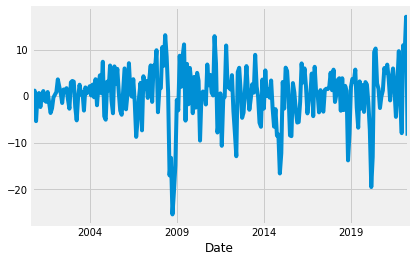

In [14]:
oil_diff = df['Open'].resample('MS').mean() - df['Open'].resample('MS').mean().shift(1)
oil_open_diff = oil_diff.dropna()
oil_open_diff.plot()

print(adf_test(oil_open_diff))

# KPSS

In [15]:
from statsmodels.tsa.stattools import kpss

In [16]:
def kpss_test(timeseries):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression="c", lags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)

In [17]:
kpss_test(df['High'])

Results of KPSS Test:
Test Statistic            2.448772
p-value                   0.010000
Lags Used                43.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


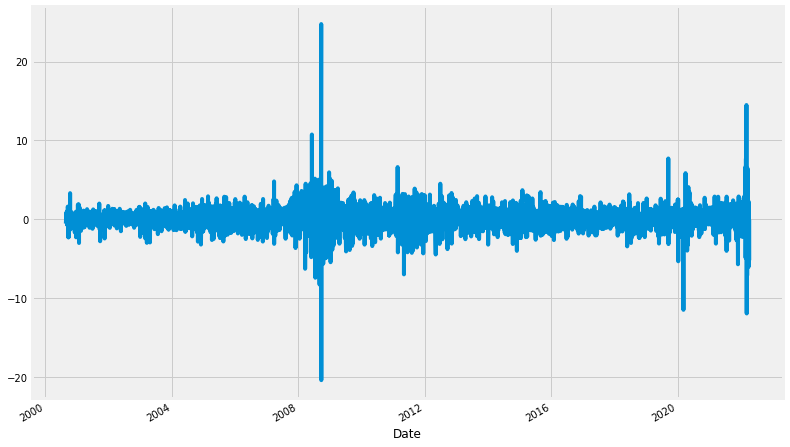

In [18]:
df['High_diff'] = df['High'] - df['High'].shift(1)
df['High_diff'].dropna().plot(figsize = (12,8))

In [19]:
kpss_test(df['High_diff'].dropna())

Results of KPSS Test:
Test Statistic           0.071099
p-value                  0.100000
Lags Used                7.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [20]:
kpss_test(df['High_diff'].resample('MS').mean().dropna())

Results of KPSS Test:
Test Statistic           0.047608
p-value                  0.100000
Lags Used                3.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [21]:
kpss_test(df['High_diff'].resample('MS').std().dropna())

Results of KPSS Test:
Test Statistic           0.269399
p-value                  0.100000
Lags Used                9.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [22]:
adf_test(df['High_diff'].dropna())

Results of Dickey-Fuller Test:
Test Statistic                -1.451689e+01
p-value                        5.605957e-27
#Lags Used                     1.900000e+01
Number of Observations Used    5.410000e+03
Critical Value (1%)           -3.431559e+00
Critical Value (5%)           -2.862074e+00
Critical Value (10%)          -2.567054e+00
dtype: float64


#Data Preprocessing

In [23]:
train_df = df['High'].iloc[:-4]

X_train = []
y_train = []

for i in range(2, len(train_df)):
  X_train.append(train_df[i-2:i])
  y_train.append(train_df[i])

In [24]:
import math
train_len = math.ceil(len(train_df)*0.8)
train_len

4342

# For Model and apply RNN + LSTM

In [25]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Activation, Dropout, TimeDistributed
from tensorflow.keras.models import Sequential

In [26]:
X_train, y_train= np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [27]:
model=Sequential()
model.add(LSTM(50,activation='relu', input_shape=(X_train.shape[1],1)))
model.add(Dense(25))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()
model.fit(X_train, y_train, epochs=10, batch_size=100, verbose=2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 11,701
Trainable params: 11,701
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
55/55 - 2s - loss: 908.7565 - 2s/epoch - 34ms/step
Epoch 2/10
55/55 - 0s - loss: 4.0814 - 174ms/epoch - 3ms/step
Epoch 3/10
55/55 - 0s - loss: 2.6928 - 191ms/epoch - 3ms/step
Epoch 4/10
55/55 - 0s - loss: 2.6606 - 197ms/epoch - 4ms/step
Epoch 5/10
55/55 - 0s - loss: 2.6326 - 187ms/epoch - 3ms/step
Epoch 

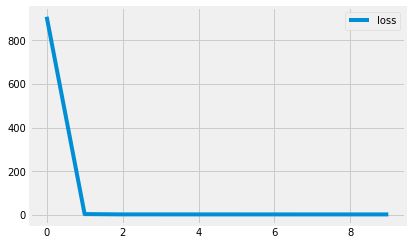

In [28]:
losse = pd.DataFrame(model.history.history)
losse[['loss']].plot()

In [29]:
test_data = train_df[train_len-2:]
X_val=[]
Y_val=[] 

for i in range(2, len(test_data)):
    X_val.append(test_data[i-2:i])
    Y_val.append(test_data[i])

In [30]:
X_val, Y_val = np.array(X_val), np.array(Y_val)
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1],1))
prediction = model.predict(X_val)

In [31]:
from sklearn.metrics import mean_squared_error
# Know the model error accuracy | the model accuracy 
lstm_train_pred = model.predict(X_train)
lstm_valid_pred = model.predict(X_val)
print('Train rmse:', np.sqrt(mean_squared_error(y_train, lstm_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(Y_val, lstm_valid_pred)))

Train rmse: 1.5906406101350814
Validation rmse: 1.772982815394717


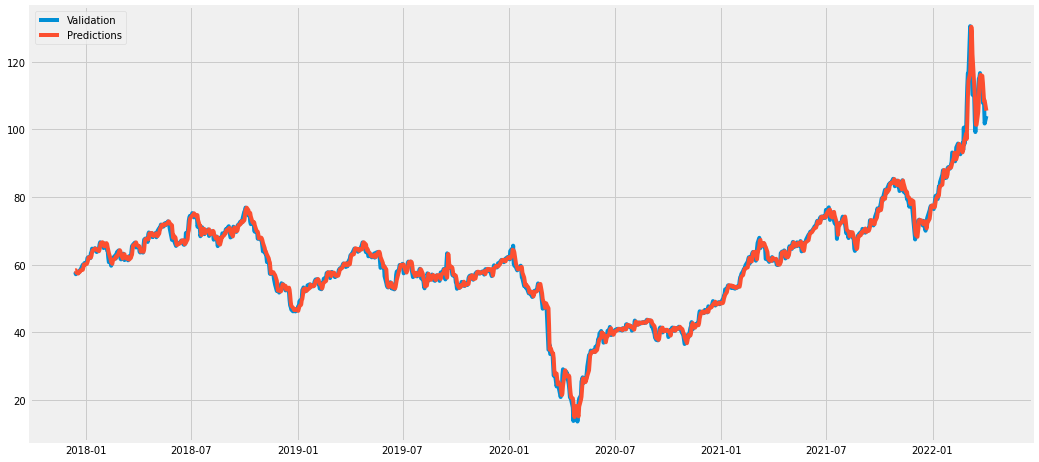

In [32]:
valid = pd.DataFrame(train_df[train_len:])
valid['Predictions']=lstm_valid_pred 
plt.figure(figsize=(16,8))
plt.plot(valid[['High','Predictions']])
plt.legend(['Validation','Predictions'])
plt.show()

In [33]:
variance = []
for i in range(len(valid)):
  
  variance.append(valid['High'][i]-valid['Predictions'][i])
variance = pd.DataFrame(variance)
variance.describe()

,0
count,1085.000000
mean,-0.035700
std,1.773441
min,-13.752541
25%,-0.771996
50%,0.028435
75%,0.770687
max,13.954826


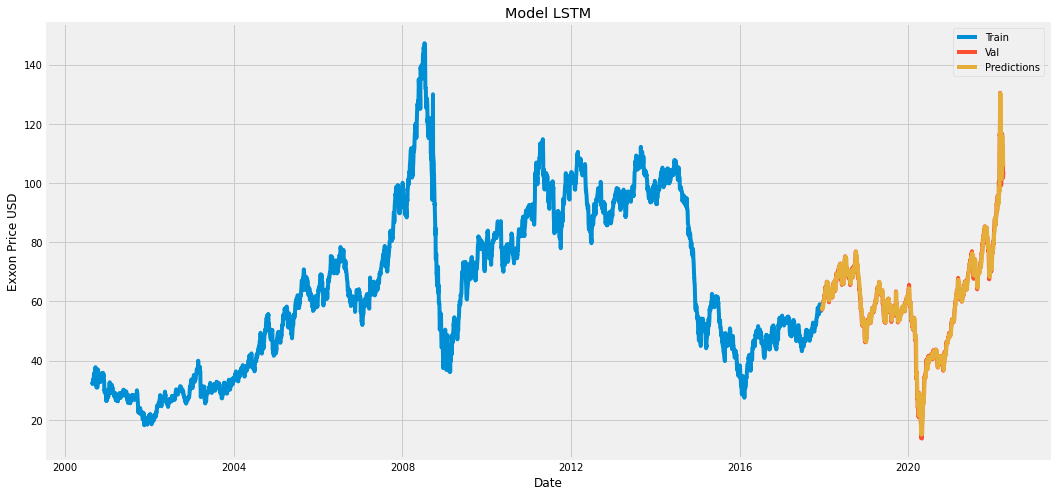

In [34]:
train = train_df[:train_len]
valid = pd.DataFrame(train_df[train_len:])
valid['Predictions']=lstm_valid_pred

plt.figure(figsize=(16,8))
plt.title('Model LSTM')
plt.xlabel('Date')
plt.ylabel('Exxon Price USD')
plt.plot(train)
plt.plot(valid[['High','Predictions']])
plt.legend(['Train','Val','Predictions'])
plt.show()